In [57]:
import pandas as pd
import numpy as np

data = pd.read_excel("./data/1_wjj.xlsx", index_col='ID')
data

,area,ck,ck-saveall,ck-drawall,ck-savetime,ck-drawtime,ck-saveavg,ck-drawavg,ck-avg,dep-saveall,...,dep-avg,dep-9201,fed-9201,fed-avg,comp,ck-changame,dep-changame,ck-changtime,dep-changtime,VV
ID,,,,,,,,,,,,,,,,,,,,,
3,7,0,-999,-999,-999,-999,0,-999,-999,0,...,0,0,-999,0,0,0,0,0,0,0
4,0,0,0,0,0,-999,0,0,-999,0,...,0,-999,-999,0,0,0,0,0,0,0
5,6,0,0,-999,0,0,0,-999,0,0,...,0,-999,0,-999,0,0,0,0,-999,0
6,6,0,0,0,-999,-999,-999,0,0,0,...,0,0,0,-999,0,0,0,0,0,0
7,0,0,0,0,-999,-999,-999,0,-999,-999,...,0,0,0,0,0,0,0,-999,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32678,1,0,0,-999,0,-999,0,0,0,0,...,1443,0,-999,-999,0,-999,0,0,-999,0
32679,8,0,-999,0,0,0,0,-999,0,-999,...,25566,0,0,-999,0,0,-999,0,0,0
32680,1,0,0,0,0,0,0,0,0,0,...,2173,0,0,0,0,0,0,0,0,0


In [58]:
X = data[data.columns[:-1]]
y = data['VV']

In [59]:
area = pd.get_dummies(X['area'], prefix='area', drop_first=True)
X = pd.concat([X, area], axis=1)
X=X.drop(labels='area', axis=1)
X

,ck,ck-saveall,ck-drawall,ck-savetime,ck-drawtime,ck-saveavg,ck-drawavg,ck-avg,dep-saveall,dep-drawall,...,dep-changtime,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9
ID,,,,,,,,,,,,,,,,,,,,,
3,0,-999,-999,-999,-999,0,-999,-999,0,-999,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,-999,0,0,-999,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,-999,0,0,0,-999,0,0,0,...,-999,0,0,0,0,0,1,0,0,0
6,0,0,0,-999,-999,-999,0,0,0,-999,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,-999,-999,-999,0,-999,-999,-999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32678,0,0,-999,0,-999,0,0,0,0,-999,...,-999,1,0,0,0,0,0,0,0,0
32679,0,-999,0,0,0,0,-999,0,-999,-999,...,0,0,0,0,0,0,0,0,1,0
32680,0,0,0,0,0,0,0,0,0,-999,...,0,1,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [11]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
oversample = BorderlineSMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over.value_counts()

0    19170
1    19170
Name: VV, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=6, max_features=20, n_estimators=200)
model.fit(X_over, y_over)

y_train_pred = model.predict(X_over)
y_valid_pred = model.predict(X_valid)
from sklearn.metrics import f1_score
print(f1_score(y_over, y_train_pred))
print(f1_score(y_valid, y_valid_pred))

0.9313564832878138
0.29329608938547486


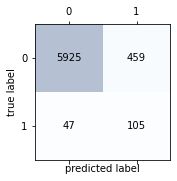

In [17]:
from sklearn.metrics import confusion_matrix

confmt = confusion_matrix(y_true=y_valid, y_pred=y_valid_pred)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmt.shape[0]):
    for j in range(confmt.shape[1]):
        ax.text(x=j, y=i, s=confmt[i, j], va='center', ha='center')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [38]:
from lightgbm.sklearn import LGBMClassifier
lgb = LGBMClassifier(reg_lambda=0.1, max_depth=5, num_leaves=31, min_child_samples=500, boosting_type='dart', random_state=42)
lgb.fit(X_over, y_over)

y_train_pred = lgb.predict(X_over)
y_valid_pred = lgb.predict(X_valid)
from sklearn.metrics import f1_score
print(f1_score(y_over, y_train_pred))
print(f1_score(y_valid, y_valid_pred))

0.9690866145819815
0.33333333333333337


In [46]:
test = pd.read_csv("./data/features3_test_2.csv")
test = test[test.columns[:-1]]
test_y = lgb.predict(test)
test_all = pd.concat([test, pd.DataFrame(test_y, columns=['y'])], ignore_index=False, axis=1)
# test_all = test_all[['area_1', 'y']]
# test_all.to_csv("./data/方笠_result.csv", index=False, header=['ID', 'VV'])
test_all.to_csv("./data/方笠_result.csv", index=False)

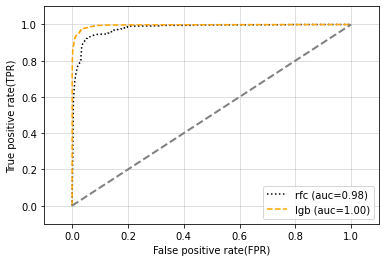

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
clfs = [model, lgb]
clf_labels = ['rfc', 'lgb']
for clf, label, clr, ls in zip(clfs, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_over, y_over).predict_proba(X_over)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_over, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc=%.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.show()

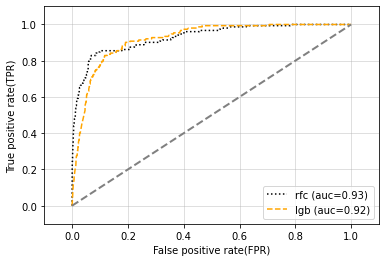

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
clfs = [model, lgb]
clf_labels = ['rfc', 'lgb']
for clf, label, clr, ls in zip(clfs, clf_labels, colors, linestyles):
    y_valid_pred = clf.fit(X_valid, y_valid).predict_proba(X_valid)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_valid, y_score=y_valid_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc=%.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.show()